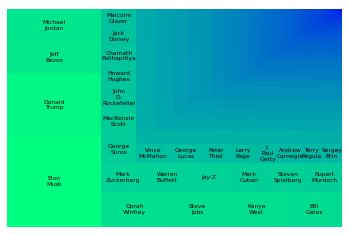

In [48]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import pickle
import helpers
import matplotlib

full_links_dict = pickle.load(open('data/billionairesdict.pkl','rb'))
full_links_dict = helpers.sort_dict(full_links_dict, nested_sort_key='total_views')
links_dict = full_links_dict #helpers.trim_dict(full_links_dict, 100)
data = {'views': [links_dict[name]['total_views'] for name in links_dict.keys()], 'person': list(links_dict.keys())}
# connectedness_total = [len(links_dict[name]['linkshere']) for name in links_dict.keys()]
data['person'] = [name.replace(' ', '\n') for name in links_dict.keys()]
first_29 = data['person'][0:29]
data['person'] = [' ' for _ in range(len(links_dict.keys()))]
data['person'][0:29] = first_29
# names = list(links_dict.keys())[0:25]
# for index, name in enumerate(names):
#     data['person'][index] = name.replace(' ', '\n')
# data['person'][0:25] = names
# print(data['person'][0:25])



df = pd.DataFrame(data)

norm = matplotlib.colors.LogNorm(vmin=min(df.views), vmax=max(df.views))
colors = [matplotlib.cm.winter(norm(value)) for value in df.views]

# plot it
squarify.plot(sizes=df['views'], label=df['person'], alpha=1, text_kwargs={'fontsize':6}, color=colors)
plt.axis('off')
plt.show()